### Evaluation Project - 4

# Global Power Plant Database

#### Problem Statement:

**Description**
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database

**The database includes the following indicators:**
- country(text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- country_long(text): longer form of the country designation
- name(text): name or title of the power plant, generally in Romanized form
- gppd_idnr(text): 10 or 12 character identifier for the power plant
- capacity_mw(number): electrical generating capacity in megawatts
- latitude(number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude(number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel(text): energy source used in primary electricity generation or export
- other_fuel1(text): energy source used in electricity generation or export
- other_fuel2(text): energy source used in electricity generation or export
- other_fuel3(text): energy source used in electricity generation or export
- commissioning_year(number): year of plant operation, weighted by unit-capacity when data is available
- owner(text): majority shareholder of the power plant, generally in Romanized form
- source(text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url(text): web document corresponding to the `source` field
- geolocation_source(text): attribution for geolocation information
- wepp_id(text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data(number): year the capacity information was reported
- generation_gwh_2013(number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014(number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015(number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016(number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017(number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018(number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019(number): electricity generation in gigawatt-hours reported for the year 2019
- generation_data_source(text): attribution for the reported generation information
- estimated_generation_gwh_2013(number): estimated electricity generation in gigawatt-hours for the year 2013
- estimated_generation_gwh_2014(number): estimated electricity generation in gigawatt-hours for the year 2014 
- estimated_generation_gwh_2015(number): estimated electricity generation in gigawatt-hours for the year 2015 
- estimated_generation_gwh_2016(number): estimated electricity generation in gigawatt-hours for the year 2016 
- estimated_generation_gwh_2017(number): estimated electricity generation in gigawatt-hours for the year 2017 
- estimated_generation_note_2013(text): label of the model/method used to estimate generation for the year 2013
- estimated_generation_note_2014(text): label of the model/method used to estimate generation for the year 2014 
- estimated_generation_note_2015(text): label of the model/method used to estimate generation for the year 2015
- estimated_generation_note_2016(text): label of the model/method used to estimate generation for the year 2016
- estimated_generation_note_2017(text): label of the model/method used to estimate generation for the year 2017 

## Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  
### 1) Primary Fuel   2) capacity_mw 


**Find the dataset link below.**

Downlaod Files:

    https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv


## Importing all required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer,StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve,plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier



from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import BaggingRegressor


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

**Getting data from source and converting into DataFrame**

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head() # Checking sample date using head (First 5 rows)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.tail() # Checking sample data using tail (last 5 rows)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking total number of rows and columns in our data
df.shape

(907, 27)

**Out dataset Global Power Plant Database have 907 rows and 27 columns.**

In [5]:
# Checking some additional information of our data (Types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Total  =   907 
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64 None


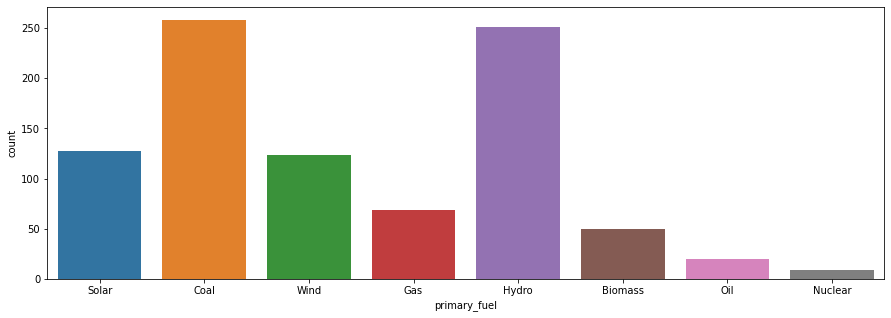

In [6]:
# Visualizing  all types of fuel available in primary_fuel
print(df['primary_fuel'].value_counts(), print('Total  =  ',df['primary_fuel'].value_counts().sum(),'\n','='*15))
plt.figure(figsize=(15,5))
sns.countplot(df['primary_fuel'])
plt.show()

Total  =   198 
Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64 None


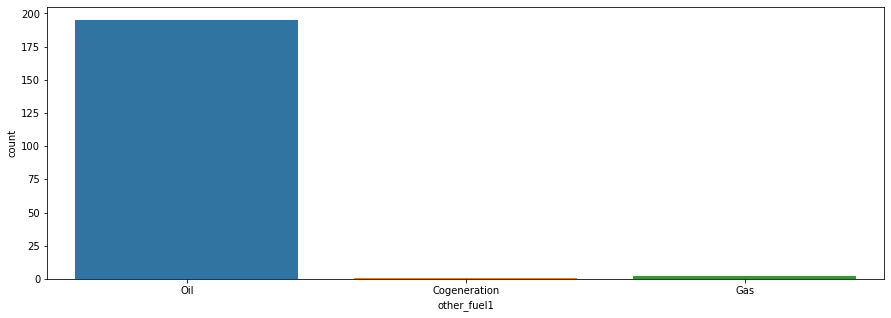

In [7]:
# Visualizing  all types of fuel available in other/secondary fuel consumption
print(df['other_fuel1'].value_counts(), print('Total  =  ',df['other_fuel1'].value_counts().sum(),'\n','='*15))
plt.figure(figsize=(15,5))
sns.countplot(df['other_fuel1'])
plt.show()

### OBSERVATION of above 2 Graphs.
===========================================================================================================================

1. There are total 8 main/primary fuel source.
2. Coal (258) has highest consumption followed by Hydro (251), there not much difference in these.
3. Nuclear stands at last with only 9 power plants using it.
4. Solar and Wind energy are almost equally consumed by power plants with 127 and 123 plants respectively.
5. Now lets check secondary fuel consption of powerplats, mostly powerplant are dependent only on primary consuptions, however there are total 198 plants which also have other options.
6. Out of which OIL is mostly used with 195 plants followed by Gas and Cogeneration with 2 and 1 plants respectively.

===========================================================================================================================

In [8]:
# Checking null values in our dataset
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [9]:
# Checking unique values in all columns
df.nunique().sort_values()

estimated_generation_gwh      0
generation_gwh_2019           0
generation_gwh_2013           0
wepp_id                       0
other_fuel3                   0
year_of_capacity_data         1
generation_data_source        1
other_fuel2                   1
country                       1
country_long                  1
other_fuel1                   3
geolocation_source            3
primary_fuel                  8
commissioning_year           73
source                      191
owner                       280
url                         304
capacity_mw                 361
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
longitude                   827
latitude                    836
name                        907
gppd_idnr                   907
dtype: int64

### OBSERVATIONS:
===========================================================================================================================

1.	19 columns have some missing values in rows, out of which 6 columns have all complete null rows(values), which means it have no information so we can remove these 6 rows. (Other_fuel2 - 906, other_fuel3 – 907, wepp_id – 907, generation_gwh_2013 – 907, generation_gwh_2019 – 907, estimated_generation_gwh – 907)
- Note - other_fuel2 have only 1 value which I have consider it in above 6.
2.	Further to this there are few more columns which have common values and can be removed. I have given detail description on these in below points.
- 	Country, country_long, generation_data_source, year_of_capacity_data – These columns have single value in each row so this can be removed as well.
- 	Column name and gppd_idnr have each different values which consist of name and unique number of values which can be removed from our dataset and this wont affect our model or data.
-   Also need to remove url columns and it is not required.
-	Here we can remove 13 columns out of 27 which will leave 14 columns, which have 2 target columns and 12 features.
3.	There are still null values in some of the columns which we will fill by mean, median or mode accordingly.
4.	As our data have categorical columns which we need to encode using label encoder.
5.	First lets begin with removing these 13 columns.

==========================================================================================================================

## DATA PREPROCESSING / DATA CLEANING
**>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>**

**As our data have null values also some of the columns are completly blank, further we need to update null values and remove unnecessary columns and update catergorical data with numerical values.**

In [10]:
# Checking all column names
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [11]:
# Droping columns which are not required
powerdata = df.drop (['country', 'country_long', 'name', 'gppd_idnr', 'other_fuel2', 'other_fuel3',
                     'estimated_generation_gwh', 'generation_gwh_2019', 'generation_gwh_2013', 'wepp_id',
                     'year_of_capacity_data', 'generation_data_source', 'url'], axis = 1)
powerdata.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [12]:
# Checking final columns after droping columns
powerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          198 non-null    object 
 5   commissioning_year   527 non-null    float64
 6   owner                342 non-null    object 
 7   source               907 non-null    object 
 8   geolocation_source   888 non-null    object 
 9   generation_gwh_2014  398 non-null    float64
 10  generation_gwh_2015  422 non-null    float64
 11  generation_gwh_2016  434 non-null    float64
 12  generation_gwh_2017  440 non-null    float64
 13  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(5)
memory usage: 99.3+ KB


In [13]:
# Checking null values in our new dataset
powerdata.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  565
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

### Filling null values

In [14]:
# Filling null values using mean, median and mode

# 1. Fill by mean

powerdata ['latitude']= powerdata['latitude'].fillna(powerdata['latitude'].mean())
powerdata ['longitude']= powerdata['longitude'].fillna(powerdata['longitude'].mean())
powerdata ['generation_gwh_2014']= powerdata['generation_gwh_2014'].fillna(powerdata['generation_gwh_2014'].mean())
powerdata ['generation_gwh_2015']= powerdata['generation_gwh_2015'].fillna(powerdata['generation_gwh_2015'].mean())
powerdata ['generation_gwh_2016']= powerdata['generation_gwh_2016'].fillna(powerdata['generation_gwh_2016'].mean())
powerdata ['generation_gwh_2017']= powerdata['generation_gwh_2017'].fillna(powerdata['generation_gwh_2017'].mean())
powerdata ['generation_gwh_2018']= powerdata['generation_gwh_2018'].fillna(powerdata['generation_gwh_2018'].mean())

# 2. Fill by median

powerdata ['commissioning_year']= powerdata['commissioning_year'].fillna(powerdata['commissioning_year'].median())

# 3. Fill my mode

powerdata ['owner']= powerdata['owner'].fillna(powerdata['owner'].mode()[0])
powerdata ['geolocation_source']= powerdata['geolocation_source'].fillna(powerdata['geolocation_source'].mode()[0])

# 4. Filling NaN by 0

powerdata ['other_fuel1'] = powerdata ['other_fuel1'].fillna (0)

### Assigning/Encoding values of catergorical data using **LABEL ENCODER**

In [15]:
# Encoding categorical data
LE = LabelEncoder()
columns =['primary_fuel','owner','source','owner','geolocation_source']
for i in columns:
    powerdata[i]=LE.fit_transform(powerdata[i])
powerdata

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,0,2011.0,229,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,0,2001.0,258,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,0,2001.0,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,0,2004.0,5,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,Oil,2015.0,5,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,Oil,2016.0,5,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,0,2001.0,114,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7,0,2001.0,5,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1,0,2001.0,91,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


**Note: We have not ecoded 'other_fuel1' column using label encoder as earlier we have replaced null values of that data with '0' which have changed its type. So using replace method to encode this column**

In [16]:
# Assiging numbers to other_fuel1 column
powerdata.replace({'other_fuel1':{'Oil':1,'Gas':2,'Cogeneration':3}},inplace = True)

In [17]:
# Checking null values
powerdata.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [18]:
# Finall checking our final data frame
powerdata

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,0,2011.0,229,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,0,2001.0,258,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,0,2001.0,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,0,2004.0,5,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,1,2015.0,5,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,1,2016.0,5,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,0,2001.0,114,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7,0,2001.0,5,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1,0,2001.0,91,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


**Our final data now has 907 rows and 14 columns**

# Data Pre-Processing and EDA (Exporatory Data Analysis)
**>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>**

### Comparting some Feature columns with target columns

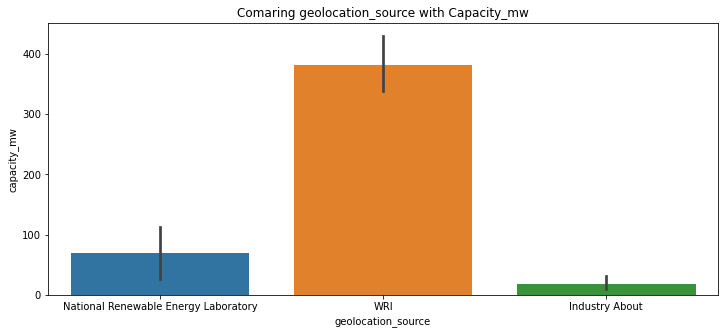

Capacity of WRI (2) is the most which is more than 350 mw, while industry (0) is least with less than 50 mw. National Renewable Energy (1) Laboratory have more than 50 mw of capacity.


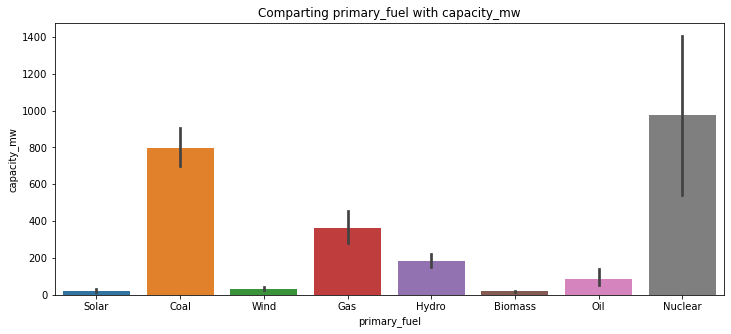

Nuclear has most capacity to generate as compared to other, it is followed by coal and gas respectively. Above plot states that solar and biomass has the least capacity.


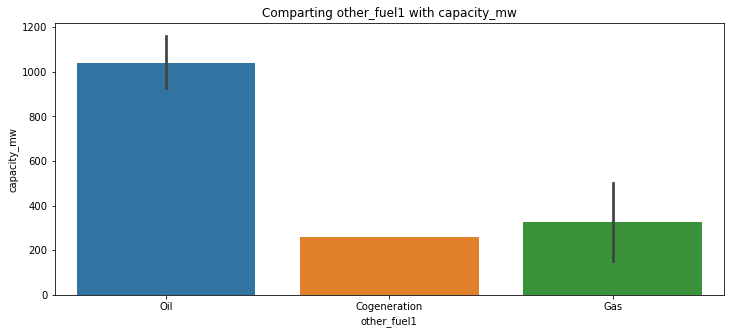

Oil has most capacity with more than 1000 mw in otherfuel followed by gas and cogeneration respectively.


In [19]:
# let's check the relation between source and capacity_mw
plt.figure(figsize = (12,5))
plt.title('Comaring geolocation_source with Capacity_mw')
sns.barplot(x = 'geolocation_source', y = 'capacity_mw', data = df)
plt.show()
print ('Capacity of WRI (2) is the most which is more than 350 mw, while industry (0) is least with less than 50 mw. National Renewable Energy (1) Laboratory have more than 50 mw of capacity.')
print ('='*120)

plt.figure(figsize = (12,5))
plt.title('Comparting primary_fuel with capacity_mw')
sns.barplot(x = 'primary_fuel', y = 'capacity_mw', data = df)
plt.show()
print ('Nuclear has most capacity to generate as compared to other, it is followed by coal and gas respectively. Above plot states that solar and biomass has the least capacity.')
print ('='*120)


plt.figure(figsize = (12,5))
plt.title('Comparting other_fuel1 with capacity_mw')
sns.barplot(x = 'other_fuel1', y = 'capacity_mw', data = df)
plt.show()
print ('Oil has most capacity with more than 1000 mw in otherfuel followed by gas and cogeneration respectively.')
print ('='*120)


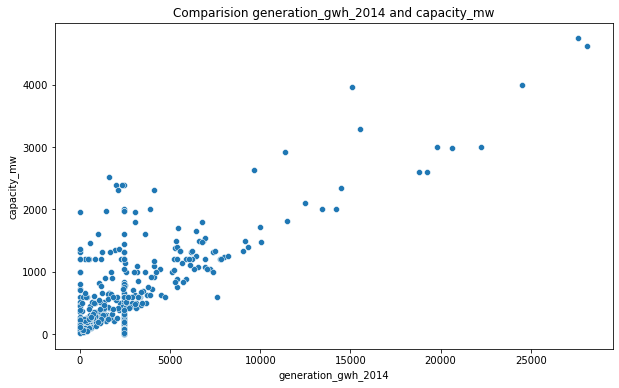

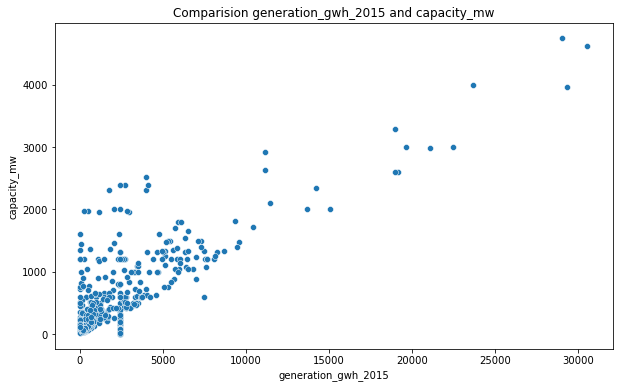

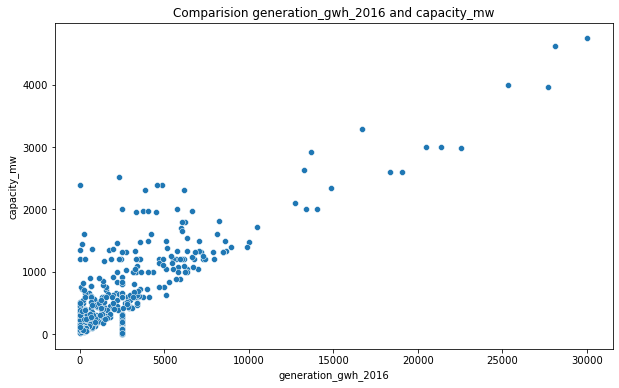

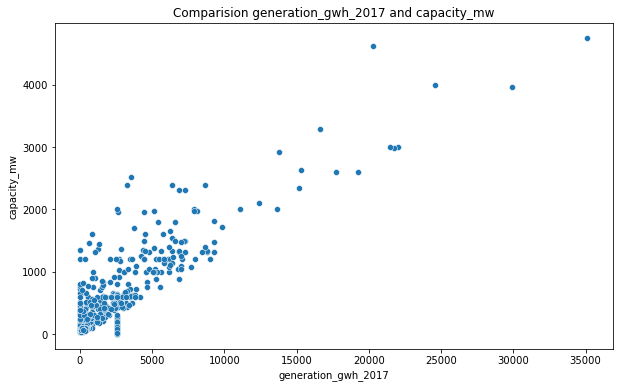

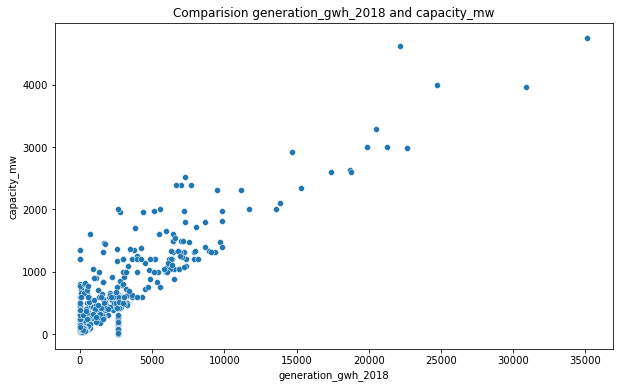

In [20]:
plt.figure(figsize=[10,6])
plt.title('Comparision generation_gwh_2014 and capacity_mw')
sns.scatterplot(powerdata['generation_gwh_2014'],powerdata['capacity_mw'])
plt.show()
print ('='*120)


plt.figure(figsize=[10,6])
plt.title('Comparision generation_gwh_2015 and capacity_mw')
sns.scatterplot(powerdata['generation_gwh_2015'],powerdata['capacity_mw'])
plt.show()
print ('='*120)

plt.figure(figsize=[10,6])
plt.title('Comparision generation_gwh_2016 and capacity_mw')
sns.scatterplot(powerdata['generation_gwh_2016'],powerdata['capacity_mw'])
plt.show()
print ('='*120)

plt.figure(figsize=[10,6])
plt.title('Comparision generation_gwh_2017 and capacity_mw')
sns.scatterplot(powerdata['generation_gwh_2017'],powerdata['capacity_mw'])
plt.show()
print ('='*120)

plt.figure(figsize=[10,6])
plt.title('Comparision generation_gwh_2018 and capacity_mw')
sns.scatterplot(powerdata['generation_gwh_2018'],powerdata['capacity_mw'])
plt.show()
print ('='*120)

### OBSERVATIONS

===========================================================================================================================

1. We have cheked comparion of yearwise generation_gwh from generation_gwh_2014 to generation_gwh_2018.
2. It show yearwise distribution from year 2014 to 2018.
3. There is little growth in each year for the power consumption.
4. Relation of all these is positively related.

===========================================================================================================================

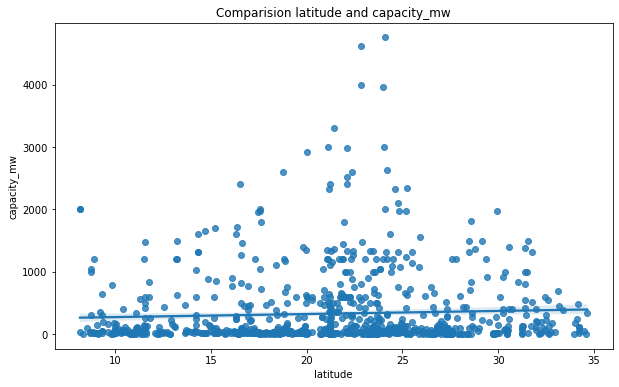

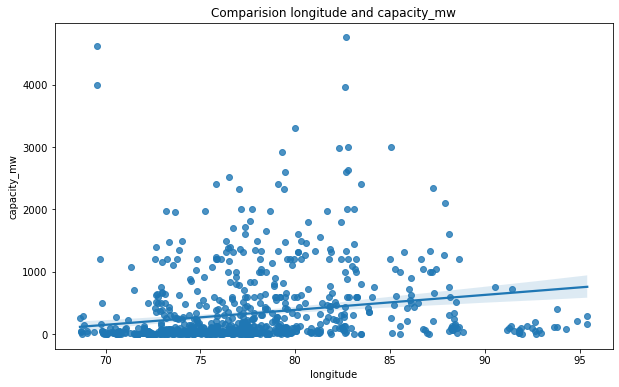

In [21]:
plt.figure(figsize=[10,6])
plt.title('Comparision latitude and capacity_mw')
sns.regplot(powerdata['latitude'],powerdata['capacity_mw'])
plt.show()
print ('='*120)

plt.figure(figsize=[10,6])
plt.title('Comparision longitude and capacity_mw')
sns.regplot(powerdata['longitude'],powerdata['capacity_mw'])
plt.show()
print ('='*120)

### OBSERVATION

===========================================================================================================================

1. With above graph we can see that there is no proper relation of latitue and longitude with capacity_mw.
2. There are also some outlier present in the data which needs to be corrected.

===========================================================================================================================

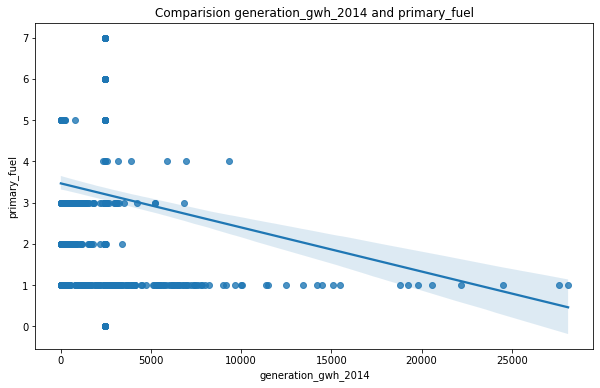

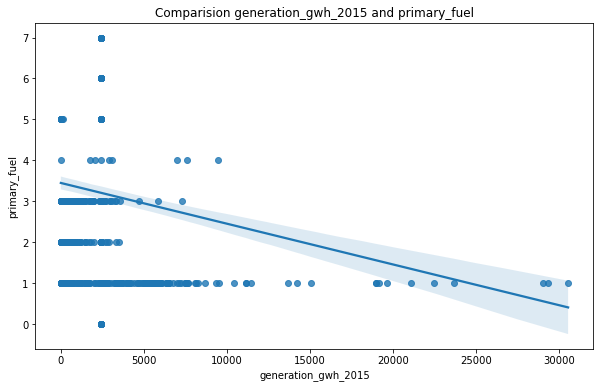

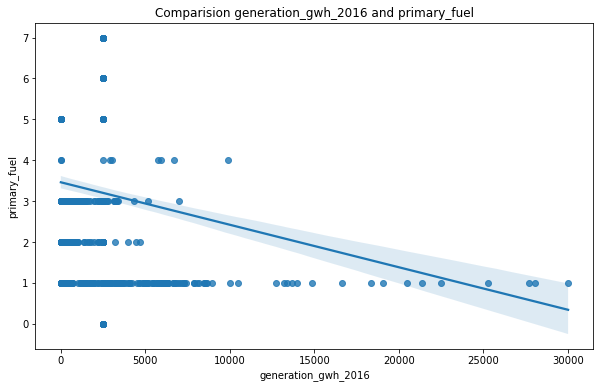

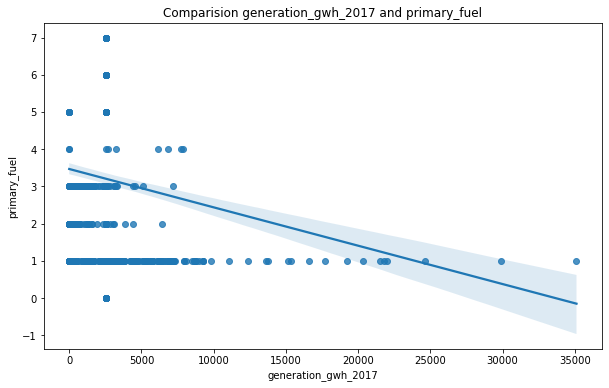

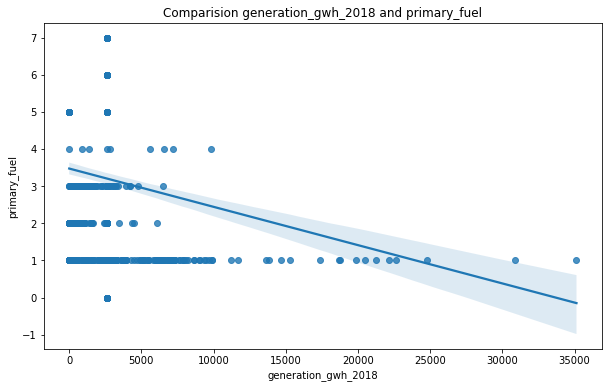

In [22]:
plt.figure(figsize=[10,6])
plt.title('Comparision generation_gwh_2014 and primary_fuel')
sns.regplot(powerdata['generation_gwh_2014'],powerdata['primary_fuel'])
plt.show()
print ('='*120)


plt.figure(figsize=[10,6])
plt.title('Comparision generation_gwh_2015 and primary_fuel')
sns.regplot(powerdata['generation_gwh_2015'],powerdata['primary_fuel'])
plt.show()
print ('='*120)

plt.figure(figsize=[10,6])
plt.title('Comparision generation_gwh_2016 and primary_fuel')
sns.regplot(powerdata['generation_gwh_2016'],powerdata['primary_fuel'])
plt.show()
print ('='*120)

plt.figure(figsize=[10,6])
plt.title('Comparision generation_gwh_2017 and primary_fuel')
sns.regplot(powerdata['generation_gwh_2017'],powerdata['primary_fuel'])
plt.show()
print ('='*120)

plt.figure(figsize=[10,6])
plt.title('Comparision generation_gwh_2018 and primary_fuel')
sns.regplot(powerdata['generation_gwh_2018'],powerdata['primary_fuel'])
plt.show()
print ('='*120)

### OBSERVATIONS

===========================================================================================================================

1. We have cheked comparion of yearwise generation_gwh from generation_gwh_2014 to generation_gwh_2018.
2. It show yearwise distribution from year 2014 to 2018.
3. There is little growth in each year for the power consumption.
4. Relation of all these is related negatively.

===========================================================================================================================

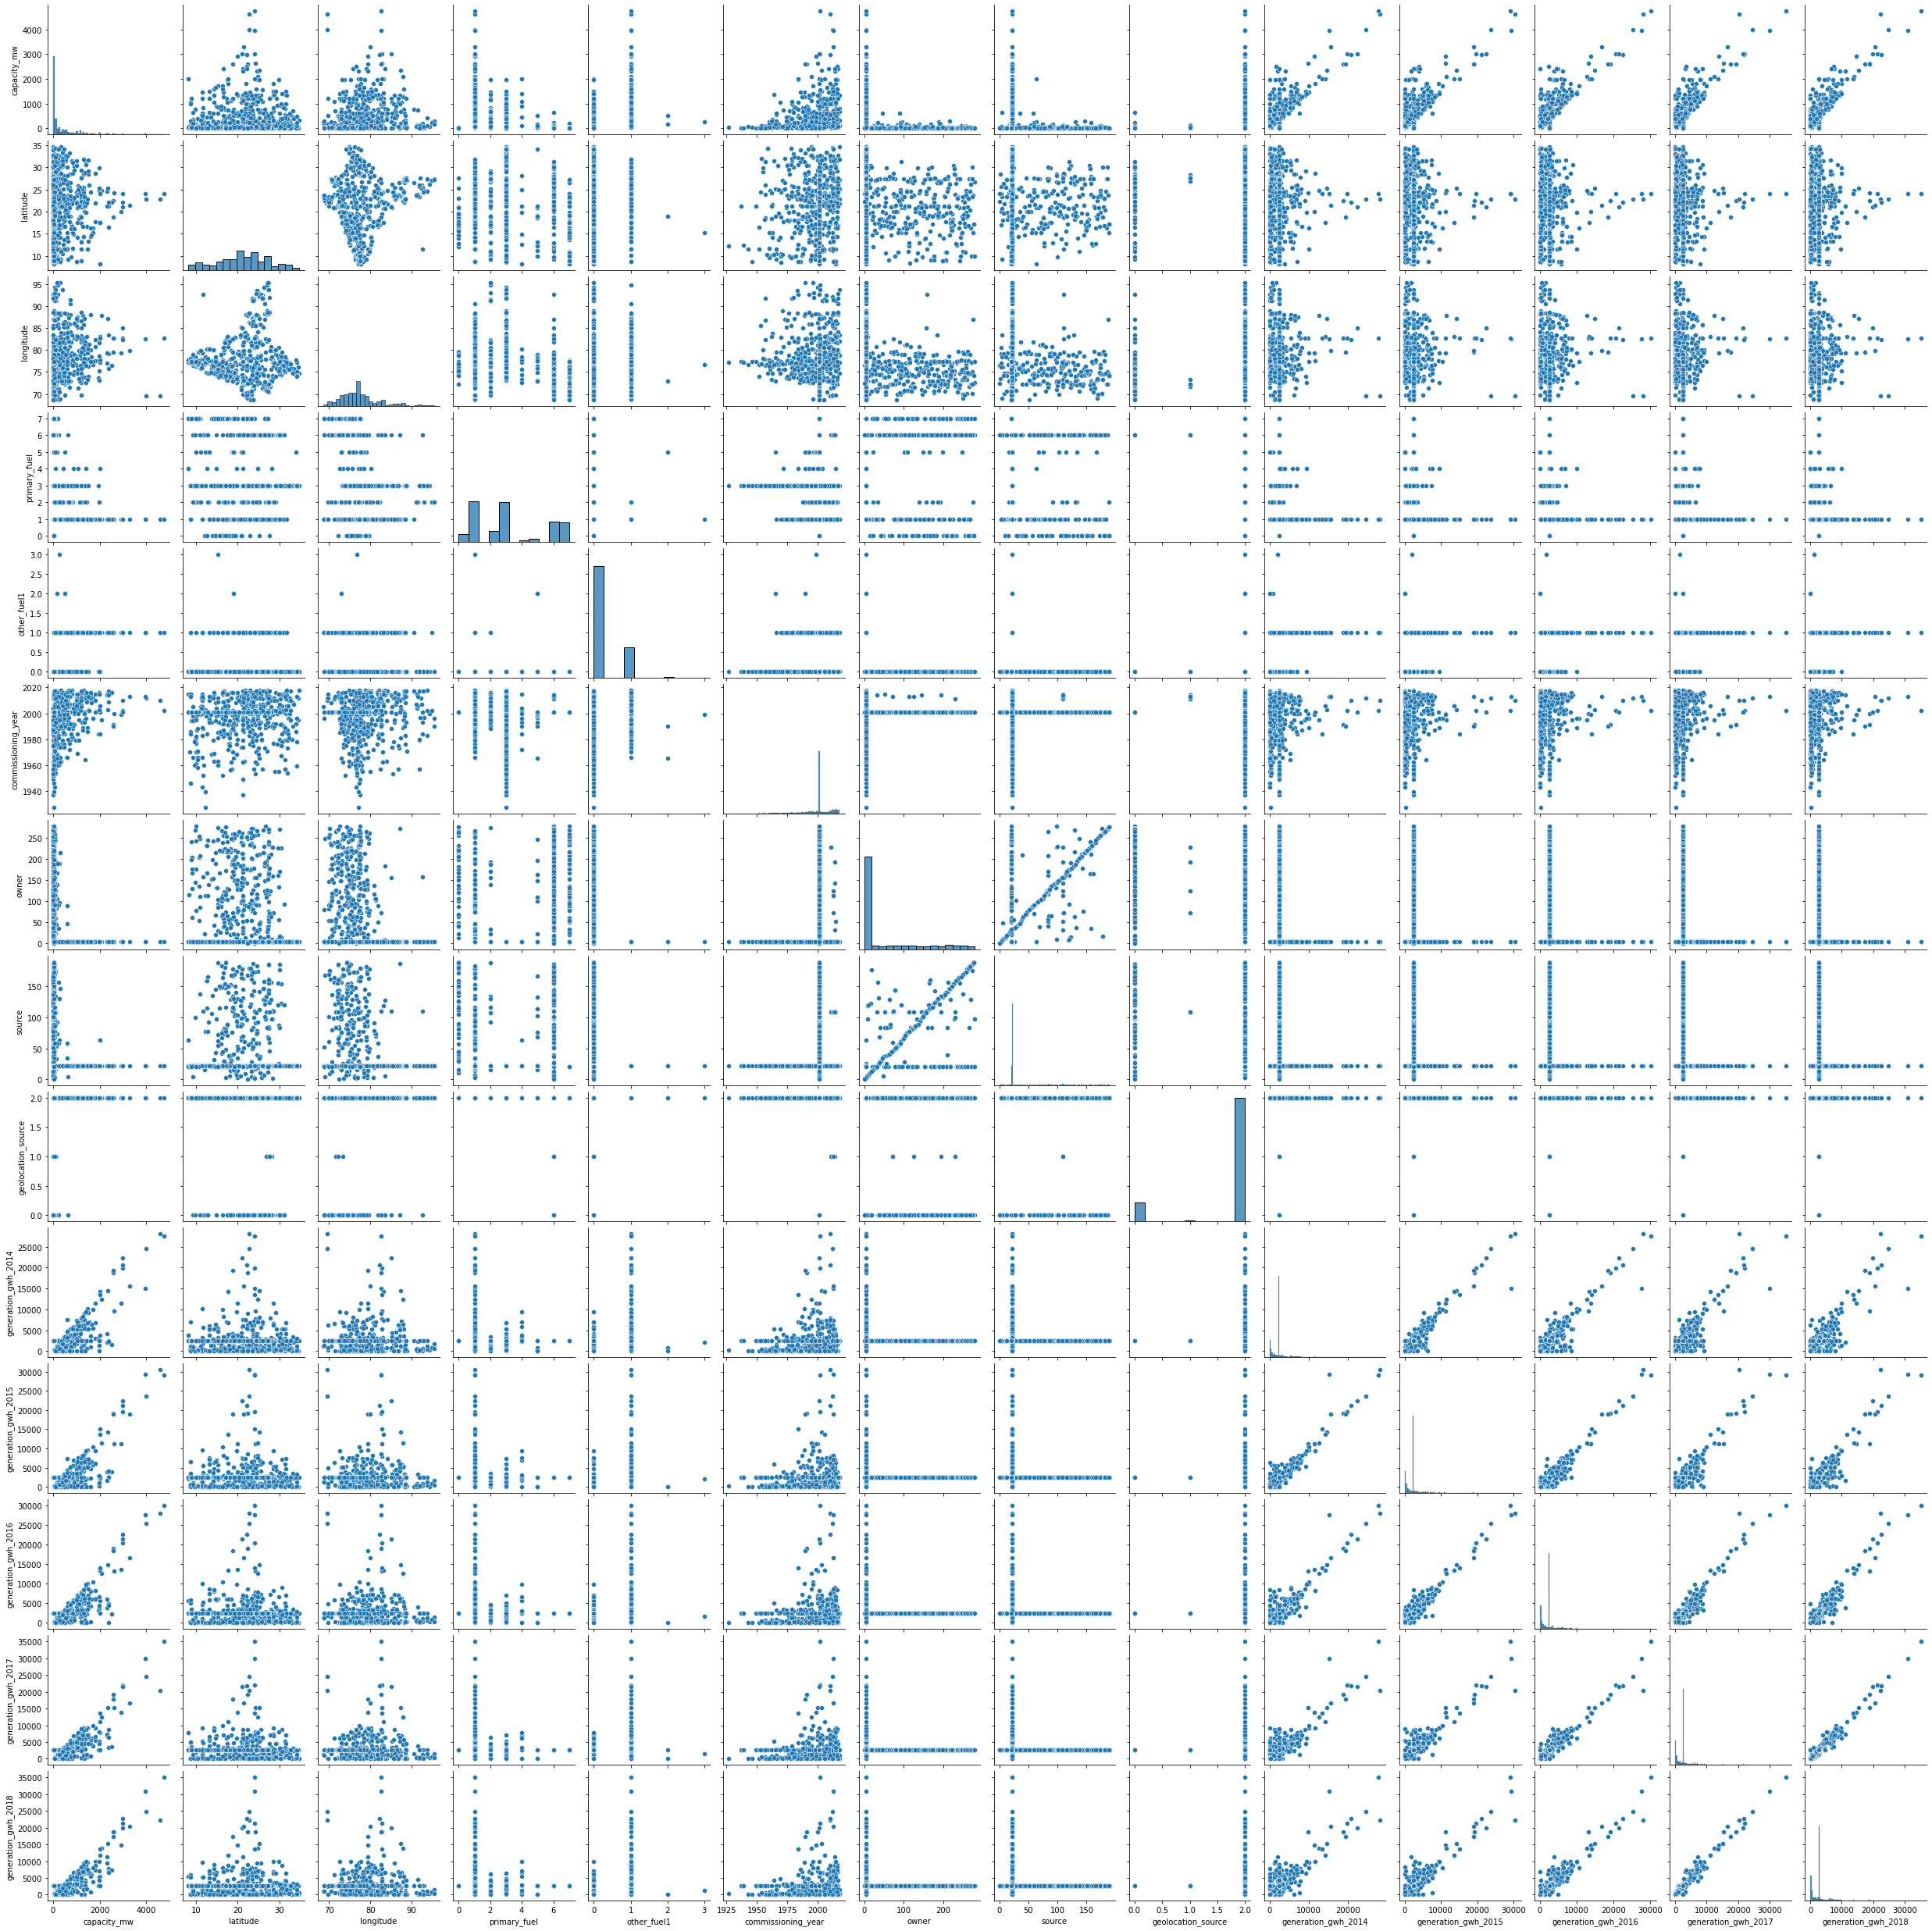

In [23]:
sns.pairplot (powerdata)

### OBSERVATIONS:

===========================================================================================================================

1. We can see the relation between the features and label.
2. Here most of features are have strong relationship with each other.
3. There are also some outliers observed in some of the columns.
4. Lets she how our data is distributed for every column.

===========================================================================================================================

#### LETS SEE HOW DATA IS DISTRIBUTED FOR EVERY COLUMN

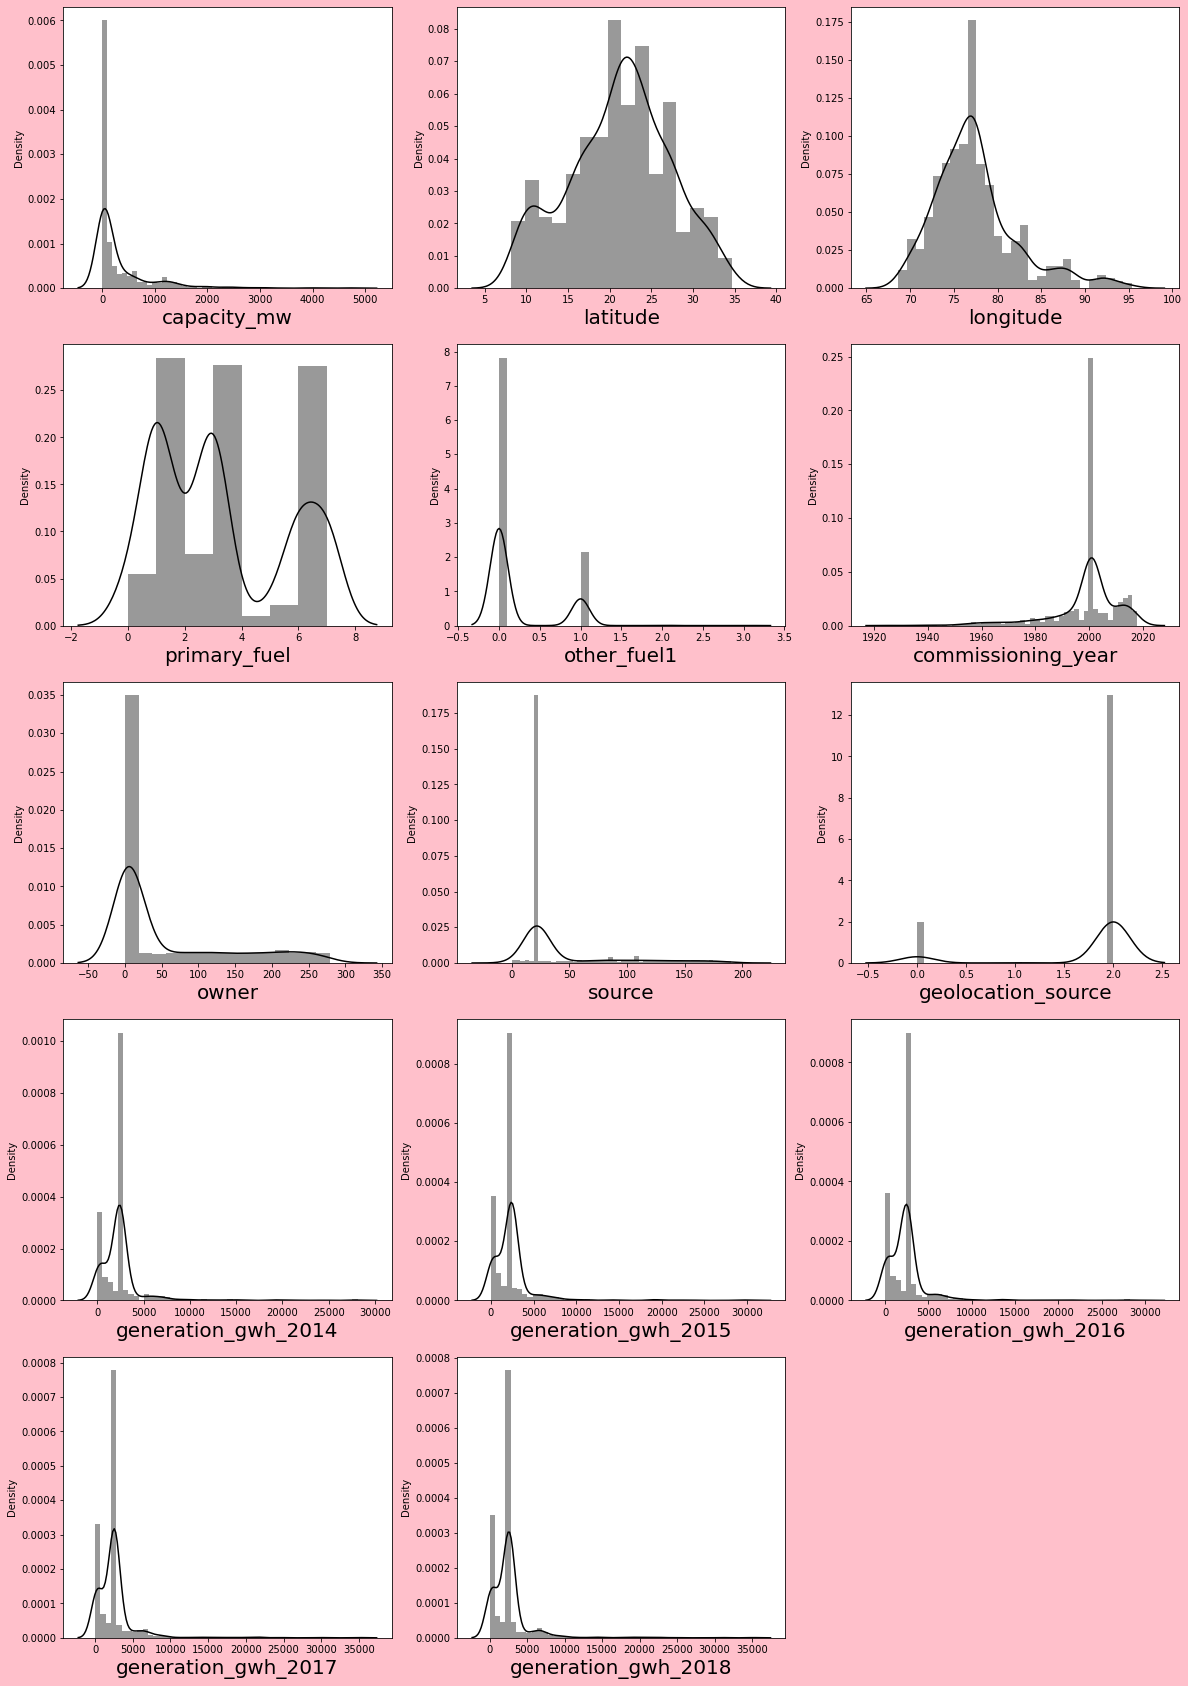

In [24]:
# lETS SEE HOW DATA IS DISTRIBUTED FOR EVERY COLUMN
plt.figure(figsize = (20,30), facecolor = 'pink')
plotnumber = 1

for column in powerdata:
    if plotnumber <= 14: #('as there are 9 columns')
        ax = plt.subplot(5,3, plotnumber)
        sns.distplot (powerdata[column], color = 'black')
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

**There is skewness in this data. Need to check if outliers are present.**
#### Checking outliers using boxplot

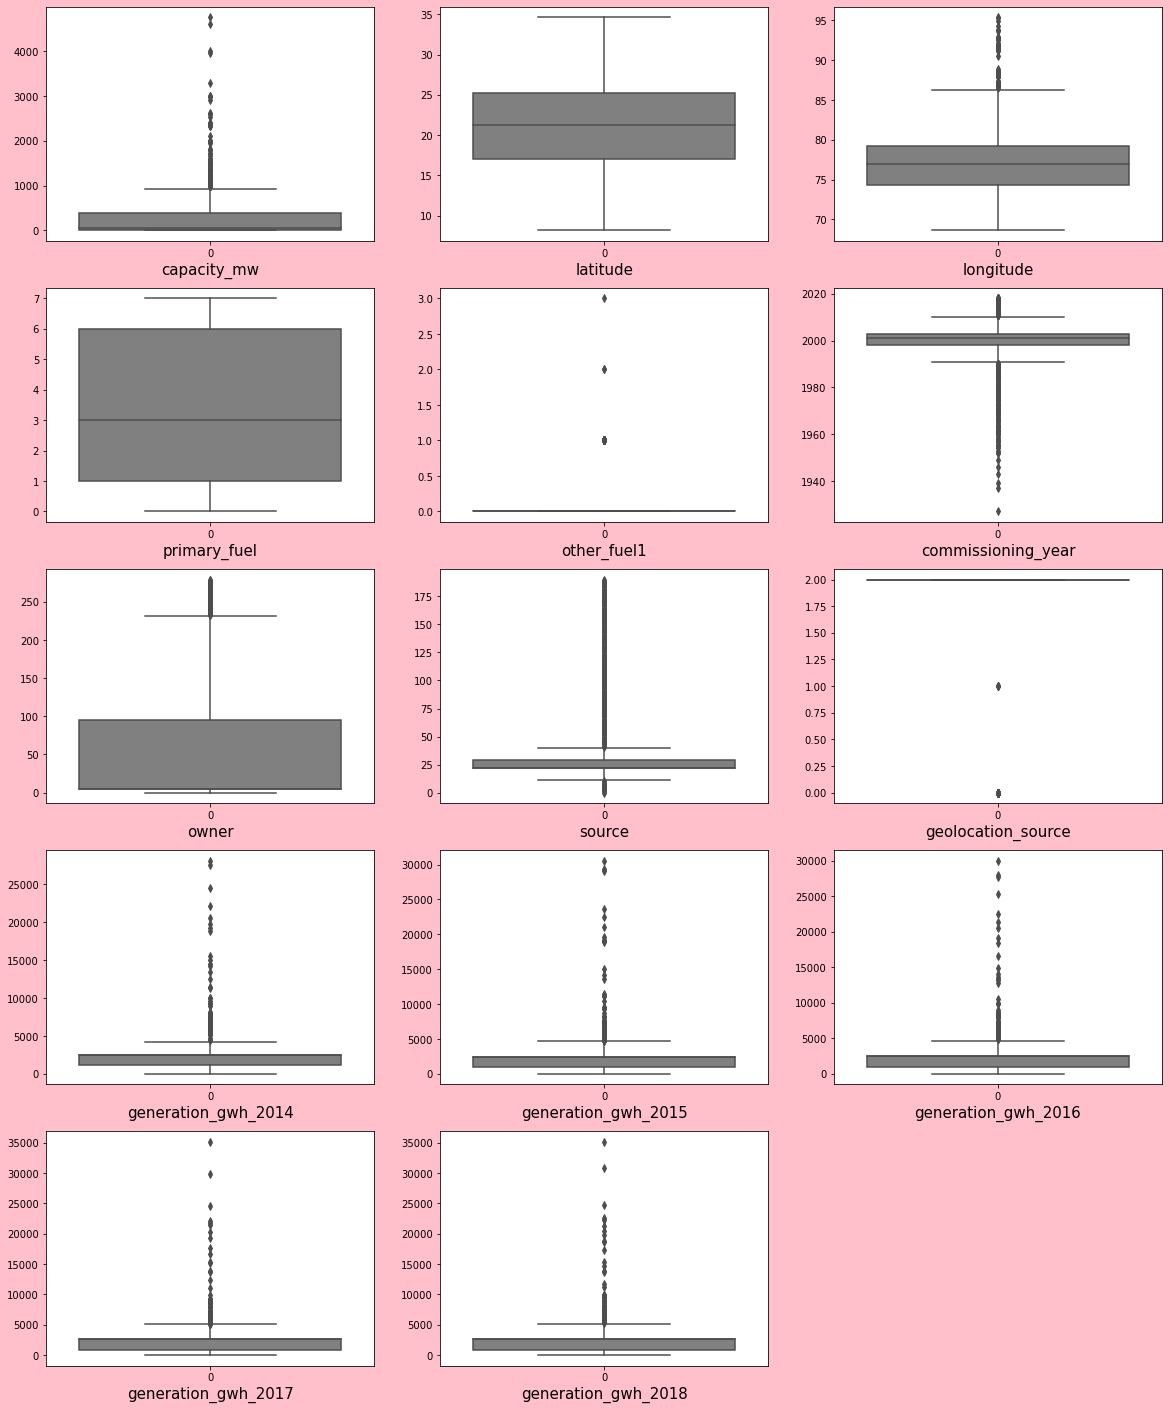

In [25]:
# Visualizing the outliers using boxplot

plt.figure (figsize = (20,25), facecolor = 'pink' )
graph = 1
for column in powerdata:
    if graph <= 14:
        plt.subplot(5,3, graph)
        ax = sns.boxplot (data = powerdata[column], color = 'grey')
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show ()

### OBSERVATIONS:
===========================================================================================================================
1.	All other columns have outliers except latitude
2.	commissioning_year have outliers both sides
3.	We further need to remove these outliers using Z score method

===========================================================================================================================

### REMOVING OUTLIERS USING Z-SCORE method

In [26]:
# Checking 
(np.abs(zscore(powerdata)<3)).all()

capacity_mw            False
latitude                True
longitude              False
primary_fuel            True
other_fuel1            False
commissioning_year      True
owner                   True
source                 False
geolocation_source      True
generation_gwh_2014    False
generation_gwh_2015    False
generation_gwh_2016    False
generation_gwh_2017    False
generation_gwh_2018    False
dtype: bool

In [27]:
# Removing outliers
scores = np.abs(zscore(powerdata))
t = 3
np.where(scores<3)

(array([  0,   0,   0, ..., 906, 906, 906], dtype=int64),
 array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))

In [28]:
# Checking data after removing outliers

new_powerdata = powerdata[(scores<3).all(axis=1)]
print(powerdata.shape)
print(new_powerdata.shape)

(907, 14)
(830, 14)


In [29]:
# Checking DATA LOSS after removing outliers

Datalosspercentage = (907-830)*100/907
print ('Data loss = ', Datalosspercentage,'%')

Data loss =  8.489525909592063 %


There is not much data loss we can proceed with this new data.

### Correlation of our data

In [30]:
# Checking correlation of columns
new_powerdata.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.045327,0.263286,-0.412484,0.635561,0.216953,-0.360982,-0.274424,0.239422,0.421028,0.428658,0.505387,0.522092,0.525173
latitude,0.045327,1.000000,-0.017048,-0.009974,0.042795,0.098684,-0.067609,0.073519,-0.195840,0.037827,0.020488,0.007591,0.006875,0.008319
longitude,0.263286,-0.017048,1.000000,-0.389801,0.357806,0.076465,-0.310265,-0.250759,0.277780,-0.059274,-0.059906,-0.019001,-0.027078,-0.023587
primary_fuel,-0.412484,-0.009974,-0.389801,1.000000,-0.495760,-0.062864,0.309158,0.063680,-0.471332,-0.037718,-0.034067,-0.045043,-0.042465,-0.042457
other_fuel1,0.635561,0.042795,0.357806,-0.495760,1.000000,0.285397,-0.324199,-0.251691,0.205331,0.292111,0.290133,0.319179,0.321787,0.318439
commissioning_year,0.216953,0.098684,0.076465,-0.062864,0.285397,1.000000,0.088396,0.079097,-0.053915,0.145699,0.176266,0.224243,0.221675,0.214117
owner,-0.360982,-0.067609,-0.310265,0.309158,-0.324199,0.088396,1.000000,0.730103,-0.375963,0.106302,0.115820,0.112172,0.114330,0.118885
source,-0.274424,0.073519,-0.250759,0.063680,-0.251691,0.079097,0.730103,1.000000,-0.520805,0.082527,0.089916,0.087085,0.088759,0.092296
geolocation_source,0.239422,-0.195840,0.277780,-0.471332,0.205331,-0.053915,-0.375963,-0.520805,1.000000,-0.067326,-0.073354,-0.071044,-0.072410,-0.075295
generation_gwh_2014,0.421028,0.037827,-0.059274,-0.037718,0.292111,0.145699,0.106302,0.082527,-0.067326,1.000000,0.889220,0.791352,0.740705,0.744673


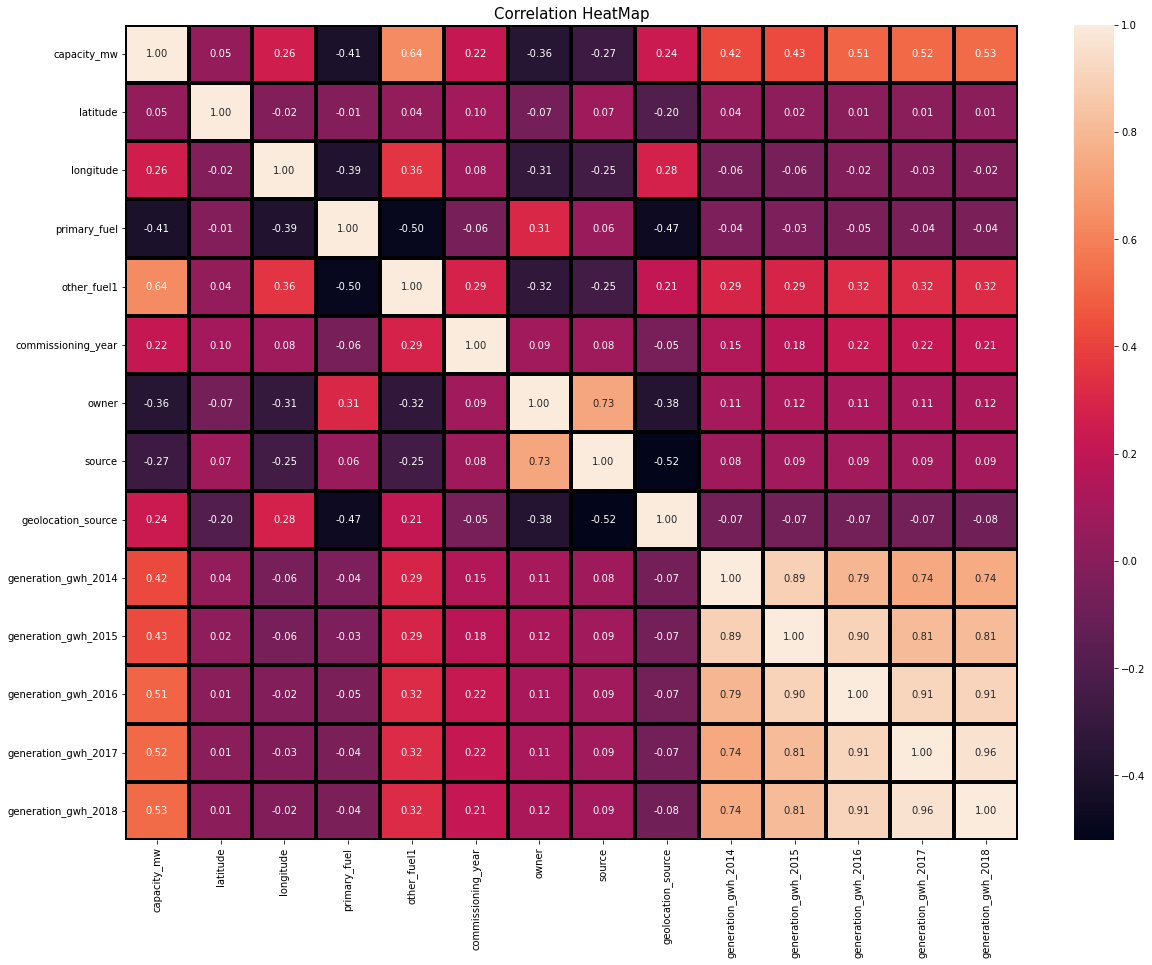

In [31]:
# Ploting heatmap to check correlation of our data

plt.figure (figsize = (20,15))
plt.title('Correlation HeatMap', fontsize = 15)
sns.heatmap(new_powerdata.corr(), annot = True , linewidths = 4, linecolor='black',fmt='.2f')
plt.show()

### Observation
===========================================================================================================================
1. capacity_mw have poitive correlation with generation_gwh_2014,generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 and generation_gwh_2018.
2. primary_fuel	have mostly negative correlation with all other columns except onwer and source
3. Lets check correlation of target variables with features using barplot

===========================================================================================================================

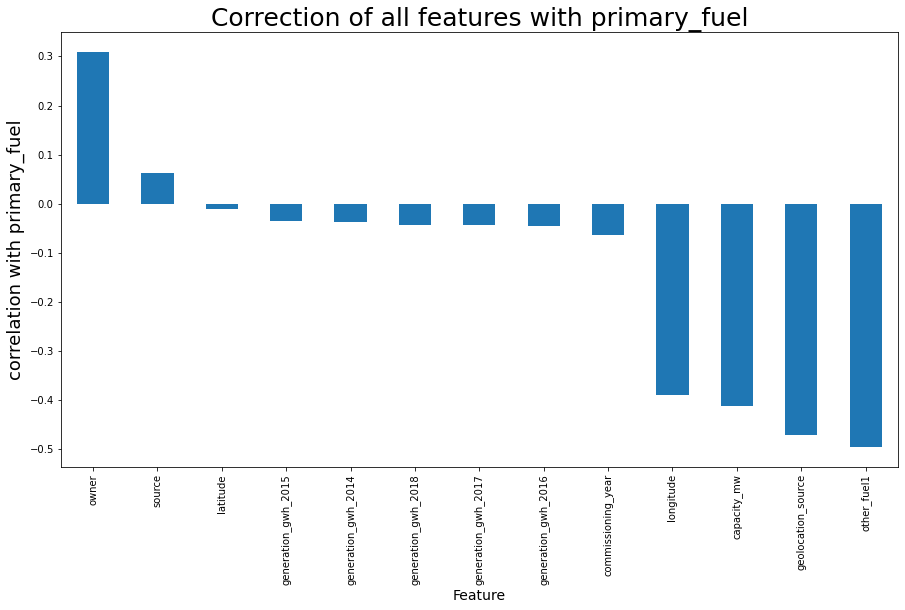

In [32]:
# Checking correlation of all features with primary_fuel 

plt.figure(figsize = (15,8))
new_powerdata.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot.bar()
plt.xlabel("Feature", fontsize = 14)
plt.ylabel("correlation with primary_fuel", fontsize = 18)
plt.title ("Correction of all features with primary_fuel", fontsize = 25)
plt.show()

### Observation
===========================================================================================================================
1. Only owner and source data have positivie figuers which which most of the data is inversly propotional to target variable.
2. colomn other_fuel_1 is highly inversly propotional to our target column followed by geolocation_source and capacity_mw respectively.
3. Onwer is most positively porpotional to target column

=========================================================================================================================

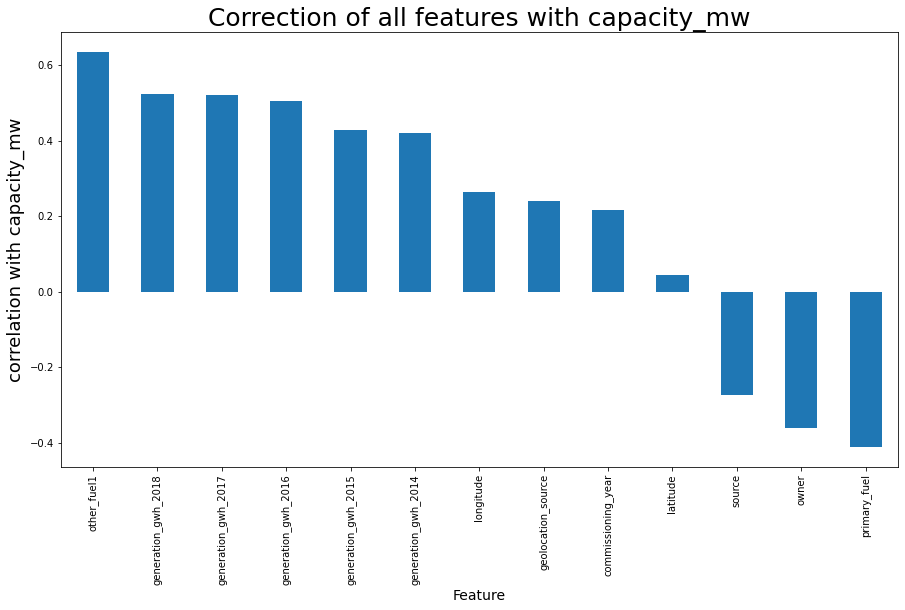

In [33]:
plt.figure(figsize = (15,8))
new_powerdata.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot.bar()
plt.xlabel("Feature", fontsize = 14)
plt.ylabel("correlation with capacity_mw", fontsize = 18)
plt.title ("Correction of all features with capacity_mw", fontsize = 25)
plt.show()

### Observation
===========================================================================================================================
1. other_fuel1 column is positively correlated to our target column followed by generation_gwh_2018,generation_gwh_2017, generation_gwh_2016, generation_gwh_2015 and generation_gwh_2014 respectively.
2. Primary fuel source and ownweer are inversly propotional to our target column
3. Now lets check skewness in our data

### Checking skewness in our data

In [34]:
new_powerdata.skew()

capacity_mw            1.949298
latitude              -0.120980
longitude              0.905603
primary_fuel           0.414200
other_fuel1            1.456348
commissioning_year    -1.265882
owner                  1.314829
source                 1.776895
geolocation_source    -2.096131
generation_gwh_2014    1.524259
generation_gwh_2015    1.391728
generation_gwh_2016    1.413406
generation_gwh_2017    1.277895
generation_gwh_2018    1.316478
dtype: float64

### Removing Skewness

In [35]:
# Dividing data in 2 variables
x = new_powerdata.drop('primary_fuel',axis=1)
y = new_powerdata['primary_fuel']
x

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,0,2011.0,229,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,0,2001.0,258,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,0,2001.0,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,0,2004.0,5,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,5,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,5,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,0,2001.0,114,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,0,2001.0,5,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,0,2001.0,91,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [36]:
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 830, dtype: int32

In [37]:
x.skew()

capacity_mw            1.949298
latitude              -0.120980
longitude              0.905603
other_fuel1            1.456348
commissioning_year    -1.265882
owner                  1.314829
source                 1.776895
geolocation_source    -2.096131
generation_gwh_2014    1.524259
generation_gwh_2015    1.391728
generation_gwh_2016    1.413406
generation_gwh_2017    1.277895
generation_gwh_2018    1.316478
dtype: float64

In [38]:
x_new=np.sqrt(x)
x_new.skew()

capacity_mw            1.144772
latitude              -0.460485
longitude              0.812642
other_fuel1            1.456348
commissioning_year    -1.276769
owner                  0.975948
source                 1.455863
geolocation_source    -2.113468
generation_gwh_2014   -0.466856
generation_gwh_2015   -0.432070
generation_gwh_2016   -0.387513
generation_gwh_2017   -0.419470
generation_gwh_2018   -0.395735
dtype: float64

In [39]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x_new)
x_new

array([[-1.64158391,  1.16319455, -0.93186635, ...,  0.35926107,
         0.36247392,  0.37502688],
       [ 0.20191861,  0.59278884, -0.51640527, ...,  0.35926107,
         0.36247392,  0.37502688],
       [-0.29347871,  0.12051583, -2.34914835, ...,  0.35926107,
         0.36247392,  0.37502688],
       ...,
       [-0.5221416 , -0.95262277, -0.24415021, ...,  0.35926107,
         0.36247392,  0.37502688],
       [ 0.09166828,  0.52378847, -0.77330458, ...,  0.35926107,
         0.36247392,  0.37502688],
       [-0.74921429, -1.79585395,  0.237933  , ...,  0.35926107,
         0.36247392,  0.37502688]])

### Splitting data into Train and Test

In [40]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=3)
print (y.shape, y_train.shape, y_test.shape)

(830,) (664,) (166,)


## MODEL SELECTION AND BUILDING
**>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>**

### A. primary_fuel

### CLASSIFICATION

- Logistic Regression 
- KNeighbors Classifier
- Descision Tree Classifier
- Random Forest Classifier
- AdaBoost Classifier
- SVC
- GradientBoostingClassifier

We sill use classifcation to find best accuracy score with above algorithms

### Finding Best Model

In [41]:
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),AdaBoostClassifier(),GradientBoostingClassifier()]
for model in models:
    model.fit(x_train,y_train)
    predlr = model.predict(x_test)
    print("Model Name = ",model)
    print('===================================')
    print("Accuracy",accuracy_score(y_test,predlr)*100,'%')
    print('===================================')
    print(confusion_matrix(y_test,predlr))
    print(classification_report(y_test,predlr))
    print('===============================================================================================================')

Model Name =  LogisticRegression()
Accuracy 53.6144578313253 %
[[ 0  0  0  0  0  0 11  1]
 [ 0 23  2  9  0  0  4  2]
 [ 0  1  1  7  0  1  3  1]
 [ 0  6  0 28  0  0  0  9]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  1  0]
 [ 0  1  0  1  0  0 18  2]
 [ 0  0  0  9  0  0  0 19]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.68      0.57      0.62        40
           2       0.33      0.07      0.12        14
           3       0.49      0.65      0.56        43
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.49      0.82      0.61        22
           7       0.56      0.68      0.61        28

    accuracy                           0.54       166
   macro avg       0.32      0.35      0.32       166
weighted avg       0.48      0.54      0.49       166

Model Name =  KNeighborsClassifier()
Accuracy 68.07228915662651 %
[[ 

### Cross Validation Score

In [42]:
for model in models:
    scr=cross_val_score(model,x,y,cv=5)
    print("Model Name :",model)
    print("Cross validation score is: ", scr.mean()*100,'%')
    print("Mean score :", (scr.mean())*100)
    print("STD :", scr.std()*100)
    print('======================================','\n')

Model Name : LogisticRegression()
Cross validation score is:  54.93975903614457 %
Mean score : 54.93975903614457
STD : 3.8928902220249437

Model Name : KNeighborsClassifier()
Cross validation score is:  65.90361445783132 %
Mean score : 65.90361445783132
STD : 3.2463117073030054

Model Name : DecisionTreeClassifier()
Cross validation score is:  87.59036144578315 %
Mean score : 87.59036144578315
STD : 3.8213859101575167

Model Name : RandomForestClassifier()
Cross validation score is:  90.12048192771086 %
Mean score : 90.12048192771086
STD : 2.241093402137139

Model Name : SVC()
Cross validation score is:  44.09638554216867 %
Mean score : 44.09638554216867
STD : 2.509959838072248

Model Name : AdaBoostClassifier()
Cross validation score is:  50.72289156626505 %
Mean score : 50.72289156626505
STD : 1.8032083791681655

Model Name : GradientBoostingClassifier()
Cross validation score is:  90.48192771084338 %
Mean score : 90.48192771084338
STD : 2.567141656947292



#### Model RandomForestClassifier has the highest score approx. 91%.** 
===================================================================================

## HyperParameter tuning - GridSearchCV
**>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>**
### RandomForestClassifier
- It has highest accuracy socre, now need to check proper accuracy socore using hyper paramerter tuning

In [43]:
rfc=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rfc,
                        param_grid={'min_samples_leaf':range(2,10),'min_samples_split':range(3,10),'max_depth':range(1,5),
                                    "max_features" :["auto", "sqrt", "log2"]},
                        cv=5,
                        n_jobs=-1)     
grid_search.fit(x_train,y_train)
print(grid_search)
print("Best parameters :",grid_search.best_params_)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})
Best parameters : {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 7}


In [44]:
rfc=RandomForestClassifier(max_depth=4,max_features='auto',min_samples_leaf=6,min_samples_split=7)
rfc.fit(x_train,y_train)
predlr=rfc.predict(x_train)
print("Model Name",rfc)
print("Accuracy",accuracy_score(y_train,predlr)*100,'%')
print ('==========================')
print(confusion_matrix(y_train,predlr))
print(classification_report(y_train,predlr))

Model Name RandomForestClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=7)
Accuracy 82.98192771084338 %
[[  0  31   0   0   0   0   0   2]
 [  0 181   0   0   0   0   0   9]
 [  0  12   2  36   0   0   0   0]
 [  0   0   0 177   0   0   0   0]
 [  0   2   0   4   0   0   0   0]
 [  0   6   0   7   0   0   0   1]
 [  0   3   0   0   0   0  96   0]
 [  0   0   0   0   0   0   0  95]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.77      0.95      0.85       190
           2       1.00      0.04      0.08        50
           3       0.79      1.00      0.88       177
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        14
           6       1.00      0.97      0.98        99
           7       0.89      1.00      0.94        95

    accuracy                           0.83       664
   macro avg       0.56      0.50      0.47       664
weight

#### After Hyperparameter tuning socre is Accuracy is approx. 83%.

### Building predictive system

In [45]:
# Building a predictive system using randomforest classifier

input_data = (2.5,28.1839,73.2407,0,2011.0,229,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099)

# changing the input data to a numpy arrary

input_data_as_numpy_array = np.asarray(input_data)

# reshaping the data as we are prediting the lable for only one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict (input_data_reshaped)
print (prediction)
print ('===')

if prediction == 0:
    print ('Primary Fuel is Solar')
elif prediction == 1:
    print('Primary Fuel is Coal')
elif prediction == 2:
    print('Primary Fuel is Wind')
elif prediction == 3:
    print('Primary Fuel is Gas')
elif prediction == 4:
    print('Primary Fuel is Hydro')
elif prediction == 5:
    print('Primary Fuel is Biomass')  
elif prediction == 6:
    print('Primary Fuel is Oil')
elif predicition ==7:
    print ('Primary Fuel is Nuclear')
else:
    print ('Other')

print ('=====================')

[6]
===
Primary Fuel is Oil


### Saving Model - primary_fuel

In [46]:
import joblib

In [47]:
joblib.dump(model.predict,'primary_fuel.obj')

['primary_fuel.obj']

In [48]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score,mean_tweedie_deviance

### B. capacity_mw

### REGRESSION:

- Random Forest Regressor
- Decision Tree Regressor
- KNeighbors Regressor
- Gradient Boosting Regressor


In [49]:
# Distributing column X and Y

X=new_powerdata.drop('capacity_mw',axis=1)
Y=new_powerdata['capacity_mw']
X # (checking X)

,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,28.1839,73.2407,6,0,2011.0,229,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,24.7663,74.6090,1,0,2001.0,258,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,21.9038,69.3732,7,0,2001.0,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,23.8712,91.3602,2,0,2004.0,5,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,21.9603,82.4091,1,1,2015.0,5,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,1,1,2016.0,5,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,12.8932,78.1654,6,0,2001.0,114,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,15.2758,75.5811,7,0,2001.0,5,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,24.3500,73.7477,1,0,2001.0,91,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [50]:
Y # (Chekcing Y)

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 830, dtype: float64

### Removing Skewness

In [51]:
X_new=np.sqrt(X)
X_new.skew()

latitude              -0.460485
longitude              0.812642
primary_fuel          -0.314812
other_fuel1            1.456348
commissioning_year    -1.276769
owner                  0.975948
source                 1.455863
geolocation_source    -2.113468
generation_gwh_2014   -0.466856
generation_gwh_2015   -0.432070
generation_gwh_2016   -0.387513
generation_gwh_2017   -0.419470
generation_gwh_2018   -0.395735
dtype: float64

In [52]:
X_new=power_transform(X_new)
X_new

array([[ 1.16319455, -0.93186635,  1.11557502, ...,  0.35926107,
         0.36247392,  0.37502688],
       [ 0.59278884, -0.51640527, -0.94802995, ...,  0.35926107,
         0.36247392,  0.37502688],
       [ 0.12051583, -2.34914835,  1.42171376, ...,  0.35926107,
         0.36247392,  0.37502688],
       ...,
       [-0.95262277, -0.24415021,  1.42171376, ...,  0.35926107,
         0.36247392,  0.37502688],
       [ 0.52378847, -0.77330458, -0.94802995, ...,  0.35926107,
         0.36247392,  0.37502688],
       [-1.79585395,  0.237933  ,  1.42171376, ...,  0.35926107,
         0.36247392,  0.37502688]])

In [53]:
std=StandardScaler()
X_scaled=pd.DataFrame(std.fit_transform(X_new),columns=X.columns)
X_scaled

,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.163195,-0.931867,1.115575,-0.509396,1.144953,1.496105,1.619271,-1.866277,0.327906,0.356338,0.359261,0.362474,0.375027
1,0.592789,-0.516406,-0.948030,-0.509396,0.002606,1.527789,2.145720,0.404723,0.327906,0.356338,0.359261,0.362474,0.375027
2,0.120516,-2.349149,1.421714,-0.509396,0.002606,-1.643253,-0.476115,0.404723,0.327906,0.356338,0.359261,0.362474,0.375027
3,0.444561,2.444089,-0.397347,-0.509396,0.318961,-0.725753,-0.412583,0.404723,-1.030644,-0.721991,-0.675600,-0.888501,-0.913997
4,0.129788,1.244353,-0.948030,1.963110,1.678078,-0.725753,-0.412583,0.404723,0.663126,1.887613,1.925062,1.553702,2.109900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,-0.789537,0.209194,-0.948030,1.963110,1.818930,-0.725753,-0.412583,0.404723,0.327906,-2.091654,-1.405095,-0.706533,-0.856285
826,-1.331133,0.398500,1.115575,-0.509396,0.002606,1.275997,1.206998,-2.487630,0.327906,0.356338,0.359261,0.362474,0.375027
827,-0.952623,-0.244151,1.421714,-0.509396,0.002606,-0.725753,-0.476115,0.404723,0.327906,0.356338,0.359261,0.362474,0.375027
828,0.523788,-0.773305,-0.948030,-0.509396,0.002606,1.190687,0.879446,0.404723,0.327906,0.356338,0.359261,0.362474,0.375027


### train_test_split

In [54]:
# SPLITTING DATA TO TRAIN AND TEST
X_train, X_test, Y_train, Y_test = train_test_split (X_scaled, Y, test_size=0.2, random_state=3)
print (Y.shape,Y_train.shape, Y_test.shape)

(830,) (664,) (166,)


### Random Forest Regressor

In [55]:
# checking r2 score for random forest regressor
RFR = RandomForestRegressor()
RFR.fit(X_train,Y_train)

# prediction
predRFR=RFR.predict(X_train)
print('R2_Score:',r2_score(Y_train,predRFR))
print('MAE:',metrics.mean_absolute_error(Y_train,predRFR))
print('MSE:',metrics.mean_squared_error(Y_train,predRFR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(Y_train,predRFR)))

R2_Score: 0.9649146407975978
MAE: 39.4598414117183
MSE: 6721.850029377556
RNSE: 81.98688937493333


### BaggingRegressor

In [56]:

# checking r2 score for bagging regressor
BR = BaggingRegressor()
BR.fit(X_train,Y_train)

# prediction
predBR=BR.predict(X_test)
print('R2_Score:',r2_score(Y_test,predBR)*100,"%")
print('MAE:',metrics.mean_absolute_error(Y_test,predBR))
print('MSE:',metrics.mean_squared_error(Y_test,predBR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(Y_test,predBR)))

R2_Score: 77.62857302411231 %
MAE: 94.09424361732644
MSE: 31680.55060200476
RNSE: 177.9903104160582


### KNeighbors Regressor|

In [57]:
# checking r2 score for Kneighbors regressor
knn = KNN()
knn.fit(X_train,Y_train)

# prediction
predknn=knn.predict(X_train)
print('R2_Score:',r2_score(Y_train,predknn))
print('MAE:',metrics.mean_absolute_error(Y_train,predknn))
print('MSE:',metrics.mean_squared_error(Y_train,predknn))
print('RNSE:',np.sqrt(metrics.mean_squared_error(Y_train,predknn)))

R2_Score: 0.8110190189750245
MAE: 91.48654096385542
MSE: 36206.03698329976
RNSE: 190.27884008291556


### Gradient Boosting Regressor

In [58]:
# checking r2 score for gradient boosting regressor
GB = GradientBoostingRegressor()
GB.fit(X_train,Y_train)

# prediction
predGB=GB.predict(X_train)
print('R2_Score:',r2_score(Y_train,predGB))
print('MAE:',metrics.mean_absolute_error(Y_train,predGB))
print('MSE:',metrics.mean_squared_error(Y_train,predGB))
print('RNSE:',np.sqrt(metrics.mean_squared_error(Y_train,predGB)))

R2_Score: 0.9520212905352166
MAE: 58.19371923664263
MSE: 9192.030435397985
RNSE: 95.87507723802878


## HyperParameter tuning - GridSearchCV
**>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>**
### Random Forest Regressor

In [59]:
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [60]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [61]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [62]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [63]:
capacity = RandomForestRegressor(criterion='mse',max_depth = 6, max_features='sqrt', n_estimators=200)
capacity.fit(X_train,Y_train)
pred = capacity.predict(X_train)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(Y_train,predRFR)))
print('R2_Score:',r2_score(Y_train,pred)*100,"%")

RMSE value: 81.98688937493333
R2_Score: 91.47404120386045 %


In [64]:
input_data = (28.1839,73.2407,6,0,2011.0,229,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099)

# changing the input data to a numpy arrary

input_data_as_numpy_array = np.asarray(input_data)

# reshaping the data as we are prediting the lable for only one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction2 = capacity.predict (input_data_reshaped)
print ('capacity_mw is = ',prediction2)

capacity_mw is =  [1304.63946885]


In [65]:
import joblib

In [66]:
joblib.dump(model.predict,'primary_fuel.obj')

['primary_fuel.obj']

### Conclusion

1. primary_fuel - We have selected 'RandomForestClassifier' as the best model, its accuracy score is approx 83%.

2. capacity_mw - We have selected 'RandomForestRegressor' as the best model, its accuracy score is 91%.